# The Cinematic Nexus: Unveiling the Future of Movie Recommendations and Analysis

by Anthony Amadasun

## 1.1 Data Cleaning and EDA 

---

### 1.1.1 Introduction




In this section, the project will detail the process of acquiring and preparing the data for our movie recommendation system. This includes data gathering, cleaning, and conducting exploratory data analysis.

---

#### Imports

In [1]:
#pip install tmdbsimple

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


import requests
import time

import getpass
import tmdbsimple as tmdb

#for transaction log
import datetime
import json

### 1.1.2 Data Collection

This project use the TMDB API to collect comprehensive movie data, ensuring a diverse and representative dataset for our recommendation system.

**Deliverables:**
- Retrieve movie data from TMDB API, ensuring comprehensive coverage of movie details.
- Validate the integrity of the dataset to avoid missing or incomplete information.
- Handle any API rate limitations, ensuring a smooth and ethical interaction with the TMDB API.

---

In [3]:
# This function uses the tmdbsimple library to interact with TMDB API
def collect_movie_data(api_key, num_movies=1000):
    tmdb.API_KEY = api_key

    # Loop to collect data until reaching the desired number of movies
    movies_data = []
    page = 1
    cumulative_movies_retrieved = 0

    while len(movies_data) < num_movies:
        try:
            response = tmdb.Discover().movie(sort_by='popularity.desc', page=page)
            if not response['results']:
                break
            page += 1
            movies_data.extend(response['results'])
            cumulative_movies_retrieved += len(response['results'])
            time.sleep(0.5)  # handles rate limitation
        except Exception as e:
            print(f"Error: {e}")
            break

        # Log transaction details
        transaction_log = {
            'execution_datetime': str(datetime.datetime.now()),
            'movies_retrieved': len(movies_data),
            'total_movies_retrieved_to_date': cumulative_movies_retrieved + len(movies_data)
        }

        # Writing to a JSON file
        with open('../data/transaction_log_movies.json', 'a') as log_file:
            log_file.write(json.dumps(transaction_log) + '\n')

    # real-time updates
#     with open('../data/transaction_log_movies.json', 'r') as log_file:
#         logs = log_file.readlines()

#         for log in logs:
#             print(log)

    return movies_data


In [4]:
api_key = getpass.getpass(prompt="Enter your TMDB API key:")

Enter your TMDB API key: ········


In [5]:
movie_data = collect_movie_data(api_key, num_movies=3000)

In [6]:
#create dataframe for the movie data
tmdb_df = pd.DataFrame(movie_data)

In [7]:
#check first 5 rows
tmdb_df.head()

adult                     backdrop_path        genre_ids      id  \
0  False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg     [28, 53, 18]  866398   
1  False  /pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg    [28, 878, 18]  933131   
2  False  /criPrxkTggCra1jch49jsiSeXo1.jpg    [878, 12, 28]  609681   
3  False  /yyFc8Iclt2jxPmLztbP617xXllT.jpg  [35, 10751, 14]  787699   
4  False  /cnqwv5Uz3UW5f086IWbQKr3ksJr.jpg     [28, 12, 14]  572802   

  original_language                original_title  \
0                en                 The Beekeeper   
1                ko                            황야   
2                en                   The Marvels   
3                en                         Wonka   
4                en  Aquaman and the Lost Kingdom   

                                            overview  popularity  \
0  One man’s campaign for vengeance takes on nati...    3775.726   
1  After a deadly earthquake turns Seoul into a l...    1734.954   
2  Carol Danvers, aka Captain Marvel, has reclaim...    1362.364   
3  Willy Wonka – chock-full of ideas and determin...    1340.068   
4  Black Manta seeks revenge on Aquaman for his f...     993.425   

                        poster_path release_date  \
0  /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10   
1  /zVMyvNowgbsBAL6O6esWfRpAcOb.jpg   2024-01-26   
2  /9GBhzXMFjgcZ3FdR9w3bUMMTps5.jpg   2023-11-08   
3  /qhb1qOilapbapxWQn9jtRCMwXJF.jpg   2023-12-06   
4  /7lTnXOy0iNtBAdRP3TZvaKJ77F6.jpg   2023-12-20   

                          title  video  vote_average  vote_count  
0                 The Beekeeper  False         7.252         881  
1               Badland Hunters  False         6.794         245  
2                   The Marvels  False         6.331        1485  
3                         Wonka  False         7.208        1955  
4  Aquaman and the Lost Kingdom  False         6.950        1510

In [8]:
#retrieve additional information such as directors and cast for the movies.
#https://developer.themoviedb.org/docs/append-to-response

for movie_id in tmdb_df['id']:
    # Make a request to the /credits endpoint for each movie
    credits_url = f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key=80c789bfee481fd91466be1937d446c3'
    credits_response = requests.get(credits_url)
    
    # Checking if the request was successful
    if credits_response.status_code == 200:
        # Parsing the response JSON to extract director and cast information
        credits_data = credits_response.json()
        directors = [crew['name'] for crew in credits_data['crew'] if crew['job'] == 'Director']
        cast = [cast_member['name'] for cast_member in credits_data['cast']]
        
        # Update DataFrame with the obtained information
        # e.g., create new columns directors and cast
        tmdb_df.loc[tmdb_df['id'] == movie_id, 'directors'] = ', '.join(directors)
        tmdb_df.loc[tmdb_df['id'] == movie_id, 'cast'] = ', '.join(cast)
    else:
        print(f"Failed to retrieve credits for movie ID {movie_id}")




In [9]:
tmdb_df.head()

adult                     backdrop_path        genre_ids      id  \
0  False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg     [28, 53, 18]  866398   
1  False  /pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg    [28, 878, 18]  933131   
2  False  /criPrxkTggCra1jch49jsiSeXo1.jpg    [878, 12, 28]  609681   
3  False  /yyFc8Iclt2jxPmLztbP617xXllT.jpg  [35, 10751, 14]  787699   
4  False  /cnqwv5Uz3UW5f086IWbQKr3ksJr.jpg     [28, 12, 14]  572802   

  original_language                original_title  \
0                en                 The Beekeeper   
1                ko                            황야   
2                en                   The Marvels   
3                en                         Wonka   
4                en  Aquaman and the Lost Kingdom   

                                            overview  popularity  \
0  One man’s campaign for vengeance takes on nati...    3775.726   
1  After a deadly earthquake turns Seoul into a l...    1734.954   
2  Carol Danvers, aka Captain Marvel, has reclaim...    1362.364   
3  Willy Wonka – chock-full of ideas and determin...    1340.068   
4  Black Manta seeks revenge on Aquaman for his f...     993.425   

                        poster_path release_date  \
0  /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10   
1  /zVMyvNowgbsBAL6O6esWfRpAcOb.jpg   2024-01-26   
2  /9GBhzXMFjgcZ3FdR9w3bUMMTps5.jpg   2023-11-08   
3  /qhb1qOilapbapxWQn9jtRCMwXJF.jpg   2023-12-06   
4  /7lTnXOy0iNtBAdRP3TZvaKJ77F6.jpg   2023-12-20   

                          title  video  vote_average  vote_count  \
0                 The Beekeeper  False         7.252         881   
1               Badland Hunters  False         6.794         245   
2                   The Marvels  False         6.331        1485   
3                         Wonka  False         7.208        1955   
4  Aquaman and the Lost Kingdom  False         6.950        1510   

          directors                                               cast  
0        David Ayer  Jason Statham, Emmy Raver-Lampman, Bobby Nader...  
1  Heo Myeong-haeng  Ma Dong-seok, Lee Hee-jun, Lee Jun-young, Roh ...  
2       Nia DaCosta  Brie Larson, Teyonah Parris, Iman Vellani, Zaw...  
3         Paul King  Timothée Chalamet, Calah Lane, Keegan-Michael ...  
4         James Wan  Jason Momoa, Patrick Wilson, Yahya Abdul-Matee...

In [10]:
#display basic information
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              3000 non-null   bool   
 1   backdrop_path      2970 non-null   object 
 2   genre_ids          3000 non-null   object 
 3   id                 3000 non-null   int64  
 4   original_language  3000 non-null   object 
 5   original_title     3000 non-null   object 
 6   overview           3000 non-null   object 
 7   popularity         3000 non-null   float64
 8   poster_path        3000 non-null   object 
 9   release_date       3000 non-null   object 
 10  title              3000 non-null   object 
 11  video              3000 non-null   bool   
 12  vote_average       3000 non-null   float64
 13  vote_count         3000 non-null   int64  
 14  directors          3000 non-null   object 
 15  cast               3000 non-null   object 
dtypes: bool(2), float64(2), 

In [11]:
#check shape
tmdb_df.shape

(3000, 16)

In [12]:
#check the data type
tmdb_df.dtypes

adult                   bool
backdrop_path         object
genre_ids             object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
poster_path           object
release_date          object
title                 object
video                   bool
vote_average         float64
vote_count             int64
directors             object
cast                  object
dtype: object

In [13]:
#Check for missing values in each columns
tmdb_df.isnull().sum()

adult                 0
backdrop_path        30
genre_ids             0
id                    0
original_language     0
original_title        0
overview              0
popularity            0
poster_path           0
release_date          0
title                 0
video                 0
vote_average          0
vote_count            0
directors             0
cast                  0
dtype: int64

In [14]:
#check for duplicates
print(f'number of duplicates in overview: {tmdb_df["overview"].duplicated().sum()}')
print(f'number of duplicates in title: {tmdb_df["title"].duplicated().sum()}')

number of duplicates in overview: 11
number of duplicates in title: 49


### 1.1.3 Data Cleaning and EDA

**Data Cleaning Deliverables:**

- Address missing or inconsistent data entries by applying appropriate imputation techniques.
- Standardize and clean data formats, ensuring consistency across different data fields.
- Handle outliers and anomalies that might impact the accuracy of recommendations.
- Normalize numerical features for better model performance.

**EDA Deliverables:**

- Conduct a thorough exploration of the dataset to gain insights into movie trends and characteristics.
- Analyze distributions of key variables such as genre, release year, and user ratings.
- Visualize the relationships between different features to identify potential patterns or correlations.
- Extract meaningful statistics to inform the modeling process.

**Dictionary**

- **Popularity:** The popularity of a movie is a metric that represents its relative popularity compared to other movies in the dataset. Popularity values are often influenced by various factors like social media mentions, views, and user interactions. Higher popularity values typically indicate that a movie is more widely known or discussed.
- **Vote Count:** The vote count represents the number of votes a movie has received. It's a measure of user engagement or participation. Higher vote counts generally indicate that more users have expressed their opinion about the movie by voting.
- **Vote Average:** The vote average is the average rating given to a movie by users who have voted. It is a measure of the overall rating or satisfaction level of a movie. Higher vote average values suggest that the movie has received more positive ratings from users.

---

In [15]:
#descriptive statistic
tmdb_df.describe()

id   popularity  vote_average    vote_count
count  3.000000e+03  3000.000000   3000.000000   3000.000000
mean   3.825520e+05    59.446837      6.596188   3569.749667
std    3.758435e+05   105.208381      1.338553   4696.778278
min    1.100000e+01    28.437000      0.000000      0.000000
25%    1.243500e+04    32.671000      6.197750    271.000000
50%    3.001025e+05    39.311000      6.775000   1814.000000
75%    6.772938e+05    54.842750      7.350000   5004.000000
max    1.235525e+06  3775.726000     10.000000  35213.000000

In [16]:
#convert release_date to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')

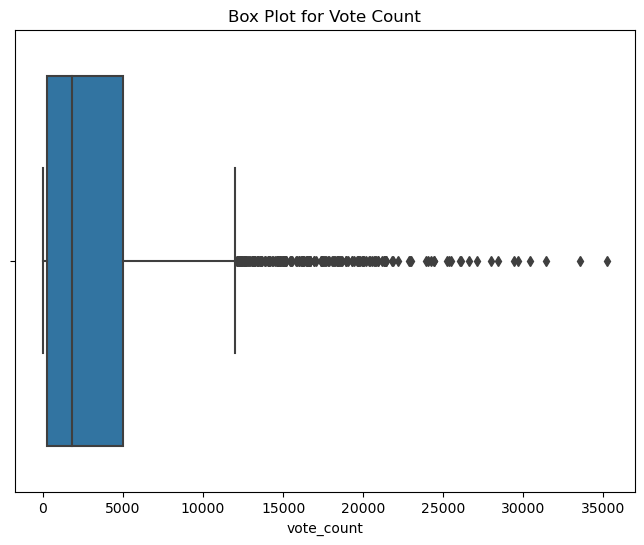

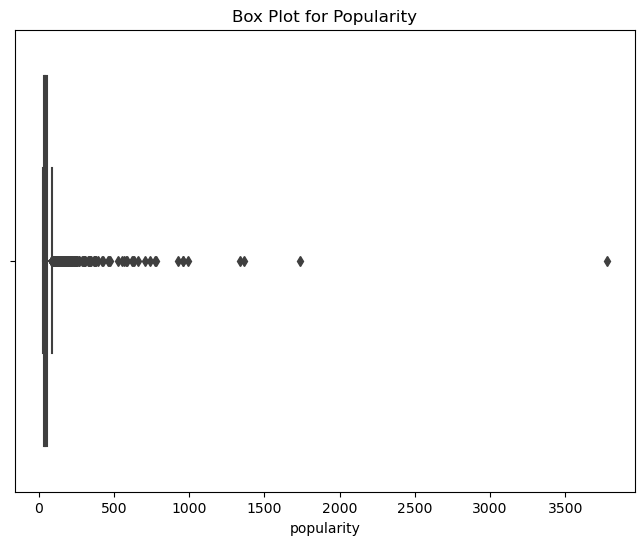

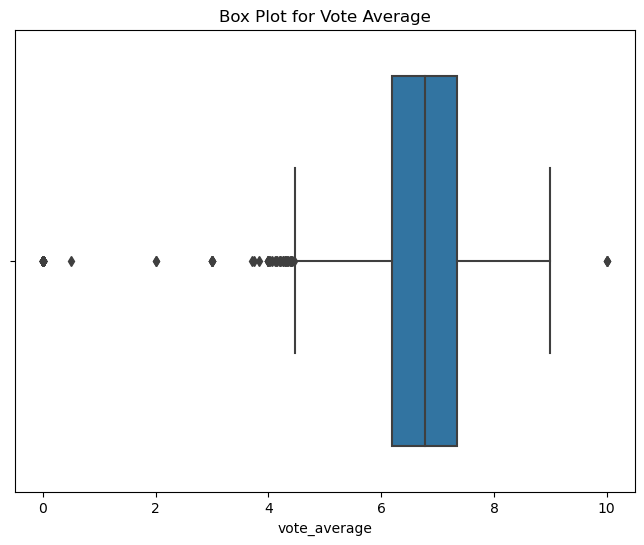

In [17]:
#box plot to check for outliers

# Box plot for vote_count
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_count'])
plt.title('Box Plot for Vote Count')
plt.savefig('../images/boxplot_vote_count.png', bbox_inches='tight')


# Box plot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['popularity'])
plt.title('Box Plot for Popularity')
plt.savefig('../images/boxplot_popularity.png', bbox_inches='tight')

plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_average'])
plt.title('Box Plot for Vote Average')
plt.savefig('../images/boxplot_vote_average.png', bbox_inches='tight')


The intution to keep outliers is based of the idea that popular movies tend to recieve higher number of votes. Removing popular movies based on vote count as outliers might not be appropriate for this recommender system as the goal of the analysis is to identify all type of movies that a users might like, rather than certain movies with a certain level of engagement. 

In [18]:
#checking duplicates in title column
title_duplicates = tmdb_df[tmdb_df.duplicated(subset='title', keep=False)]
title_duplicates

adult                     backdrop_path               genre_ids  \
46    False  /jYEW5xZkZk2WTrdbMGAPFuBqbDc.jpg               [878, 12]   
156   False  /7VEUOEfRzzrQfWddlIyLUKvh6Nf.jpg  [12, 10751, 14, 10749]   
217   False  /mpIpHN7DJprENGiSvxOaG5mLzht.jpg                    [35]   
269   False  /mUYV0ZdsDEliGaQahcQH1F3grsP.jpg         [16, 10751, 12]   
305   False  /xfOB4nbbVMWC0F2v6AxwWH5BIOI.jpg                    [35]   
...     ...                               ...                     ...   
2818  False  /9CyFLGfeDOrOOPouHp446T5MSNi.jpg            [53, 18, 27]   
2849  False  /fySqZjkjbBESaGfPfGGg3jd9wCb.jpg      [18, 53, 9648, 28]   
2913  False  /eNJhWy7xFzR74SYaSJHqJZuroDm.jpg               [878, 28]   
2935  False  /vHse4QK31Vc3X7BKKU5GOQhYxv6.jpg                [27, 53]   
2982  False  /zlpZzccypkAYFZIyYLQcchl90ZC.jpg    [878, 28, 80, 10770]   

           id original_language      original_title  \
46     438631                en                Dune   
156    447277                en  The Little Mermaid   
217    673593                en          Mean Girls   
269     10674                en               Mulan   
305     10625                en          Mean Girls   
...       ...               ...                 ...   
2818   864873                en            Hypnotic   
2849    87516                en              Oldboy   
2913  1033219                en     Attack on Titan   
2935   533642                en        Child's Play   
2982   225914                en          Spider-Man   

                                               overview  popularity  \
46    Paul Atreides, a brilliant and gifted young ma...     267.824   
156   The youngest of King Triton’s daughters, and t...     124.520   
217   New student Cady Heron is welcomed into the to...     108.612   
269   To save her father from certain death in the a...      95.658   
305   Cady Heron is a hit with The Plastics, the A-l...      90.076   
...                                                 ...         ...   
2818  A young woman seeking self-improvement enlists...      29.247   
2849  A man has only three and a half days and limit...      29.115   
2913  As viable water is depleted on Earth, a missio...      28.833   
2935  Karen, a single mother, gifts her son Andy a B...      28.757   
2982  When an extortionist threatens to force a mult...      28.501   

                           poster_path release_date               title  \
46    /d5NXSklXo0qyIYkgV94XAgMIckC.jpg   2021-09-15                Dune   
156   /ym1dxyOk4jFcSl4Q2zmRrA5BEEN.jpg   2023-05-18  The Little Mermaid   
217   /fbbj3viSUDEGT1fFFMNpHP1iUjw.jpg   2024-01-10          Mean Girls   
269   /5TYgKxYhnhRNNwqnRAKHkgfqi2G.jpg   1998-06-18               Mulan   
305   /2ZkuQXvVhh45uSvkBej4S7Ix1NJ.jpg   2004-04-30          Mean Girls   
...                                ...          ...                 ...   
2818  /miEj4kNc4efZ5WbPJqWl1UXWrvS.jpg   2021-10-27            Hypnotic   
2849  /iX93YdBrZA1EpGbphmjf4ARj1Za.jpg   2013-11-14              Oldboy   
2913  /ay8SLFTMKzQ0i5ewOaGHz2bVuZL.jpg   2022-09-30     Attack on Titan   
2935  /rpS7ROczWulqfaXG2klYapULXKm.jpg   2019-06-19        Child's Play   
2982  /jNxRHZ2cxVkNRtxgHuCtv7GY4JP.jpg   1977-09-14          Spider-Man   

      video  vote_average  vote_count                         directors  \
46    False         7.785       10003                  Denis Villeneuve   
156   False         6.410        2583                      Rob Marshall   
217   False         6.614         123  Samantha Jayne, Arturo Perez Jr.   
269   False         7.914        9157         Tony Bancroft, Barry Cook   
305   False         7.201        8246                       Mark Waters   
...     ...           ...         ...                               ...   
2818  False         6.052         567         Matt Angel, Suzanne Coote   
2849  False         5.923        1851                         Spike Lee   
2913  False         6.018         167  

In [19]:
#checking duplicates in overview column
overview_duplicates = tmdb_df[tmdb_df.duplicated(subset='overview', keep=False)]
overview_duplicates

adult                     backdrop_path            genre_ids       id  \
83    False  /j6HmtpElHPSkoRIGNlkcqC5aU9g.jpg                 [80]   101251   
306   False                              None          [18, 10749]  1156593   
807   False  /jjKsbvn1R0UfyjKzfCt2u5almcb.jpg                 [16]  1070830   
1125  False  /eM3mtxc9OMFghS9K0uDc9DWzIrD.jpg     [53, 80, 28, 18]   995206   
1452  False                              None                   []  1029529   
1501  False  /jq09EVjtlyQgp9kjF5O6SBtdfbH.jpg                 [53]   705714   
2108  False                              None                 [18]   809366   
2227  False  /mAjaDmRpBVUcaYBi93NEkqTaWI1.jpg             [18, 14]   903550   
2243  False  /kimTJ3sJdroBwvXhwTNsxqvJ836.jpg  [16, 10751, 35, 14]   421892   
2330  False  /7CamWBejQ9JQOO5vAghZfrFpMXY.jpg         [28, 53, 80]   928381   
2489  False  /tCI7EP8IBdeV4BR05zmzW3JIjwx.jpg                   []  1164486   
2887  False  /97t4XhyEWCVOLUnoWUYCh29tVQ4.jpg                 [14]  1000678   
2948  False                              None                 [18]   422585   

     original_language                                     original_title  \
83                  en                    El Padrino II: Border Intrusion   
306                 es                                         Culpa tuya   
807                 es                               Una aventura gigante   
1125                ja                                             最後まで行く   
1452                ja                                               無力の王   
1501                it                                    Dietro la notte   
2108                es                                            Alegría   
2227                zh                                            寻龙之发丘天棺   
2243                en                                            Shrek 5   
2330                fr                                         Sans répit   
2489                ja  Rick and Morty: The Great Yokai Battle of Akih...   
2887                fr                                    Substance noire   
2948                es                                  Historias de sexo   

                                               overview  popularity  \
83                                                          181.165   
306                                                          89.815   
807                                                          53.010   
1125  After going to extremes to cover up an acciden...      45.329   
1452                                                         39.821   
1501                                                         39.307   
2108                                                         33.643   
2227                                                         32.863   
2243                                                         32.703   
2330  After going to extremes to cover up an acciden...      32.153   
2489                                                         31.098   
2887                                                         28.930   
2948                                                         28.668   

                           poster_path release_date  \
83    /yHtPjWgO3wCnY21qKL3NjbBbthx.jpg   2008-01-01   
306   /3pkjbiL9ju2VdLohIGW4NOYkASi.jpg          NaT   
807   /Aayn0BuqROMfgKWrOVWxEc4aZ0X.jpg   2023-01-12   
1125  /zZFqGmhJMUiTuEJSneIbI7N5sCw.jpg   2023-05-19   
1452  /1ygQF47pqJzqBkULLh87T6k0Mv9.jpg   1981-08-29   
1501  /m1qZxNk64lJ4R9V9qRqUnoZQpRA.jpg   2021-04-28   
2108  /1vdhF6UQn1jHiVy9xEBsXmqywpm.jpg   2021-12-10   
2227  /tjEENgM9uPlwRGfOePj4G3FW0wG.jpg   2021-11-24   
2243  /rtlY3u7g5VClRuqqJmnZP0fMMiQ.jpg          NaT   
2330  /9MP21x0OPv0R72obd63tMHssmGt.jpg   2022-02-25   
2489  /7aCOzT1lLtfOzHni8xIe4dbpEwC.jpg   2021-10-11   
2887  /1BXLiv2xfgHsMKp0N87j43E06o9.jpg   2021-01-07   
2948  /f2ZYuXDZ0gVJoFWJVp7nzevNopB.jpg   1999-01-01   

                                                  titl

The duplicates found in overview and title is related to having nothing filled out in it columns, having different production year (but same name) or having same title and overview, but different feature (e.g., korean version, vote average, etc.) As a result the duplicates are not genuinely redundant and they are worth keep as they provide additional information.

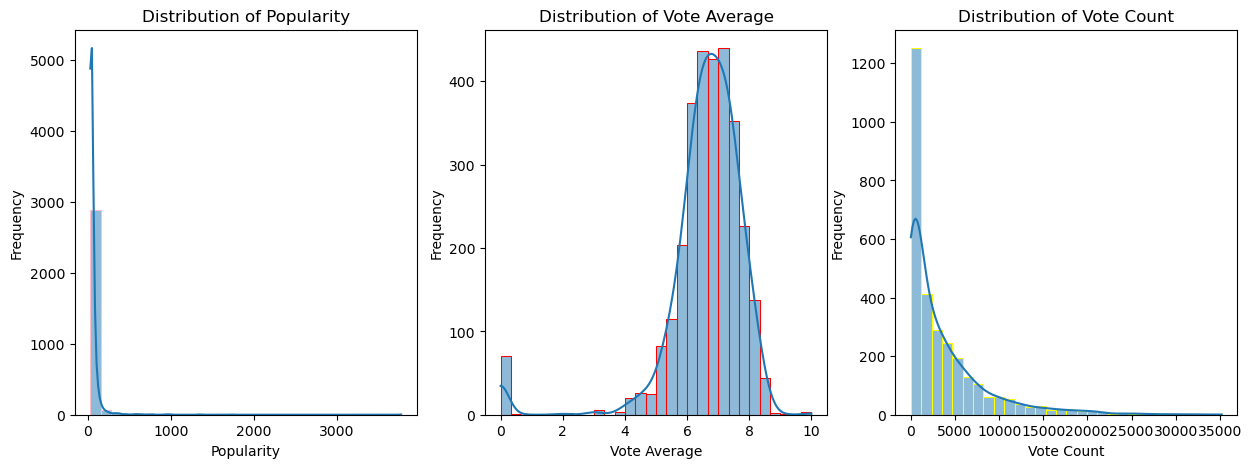

In [20]:
# #check distribution to see if the distribution is already well-behaved 
# #and within a reasonable range

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograms with KDE for 'popularity', 'vote_average', and 'vote_count'
sns.histplot(tmdb_df['popularity'], bins=30, kde=True, edgecolor='pink', ax=axes[0])
axes[0].set_title('Distribution of Popularity')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Frequency')

sns.histplot(tmdb_df['vote_average'], bins=30, kde=True, edgecolor='red', ax=axes[1])
axes[1].set_title('Distribution of Vote Average')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Frequency')

sns.histplot(tmdb_df['vote_count'], bins=30, kde=True, edgecolor='yellow', ax=axes[2])
axes[2].set_title('Distribution of Vote Count')
axes[2].set_xlabel('Vote Count')
axes[2].set_ylabel('Frequency')

plt.savefig('../images/distribution.png', bbox_inches='tight')



In [21]:
#Normalize numerical features for better model performance
scaler = MinMaxScaler()

tmdb_df['popularity_normalized'] = scaler.fit_transform(tmdb_df[['popularity']])


tmdb_df['vote_count_normalized'] = scaler.fit_transform(tmdb_df[['vote_count']])

tmdb_df['vote_average_normalized'] = scaler.fit_transform(tmdb_df[['vote_average']])

**Interpretation**

Normalization was implemented because of the wide range and variability in popularity and vote count (minimum popularity is 18.09 and maximum is 4578.60 | the minimum vote count is 0, and the maximum is 35205 which indicates large range of values).

The distribution of popularity and vote count is right skewed, which in the case of popularity, it suggests that there are a few movies that are extremely popular. While in the case of vote_count, it suggests that there are a few movies with exceptionally high vote counts. The distribution of vote averages is left skewed, which indicates that there might be a concentration of movies with higher ratings 

**Visualize Genre**

In [22]:
#Explore the genres
genre_counts = tmdb_df['genre_ids'].explode().value_counts()
genre_counts

genre_ids
28       1118
18        973
35        841
53        824
12        803
14        529
878       503
16        502
10751     481
27        436
80        392
10749     364
9648      240
36        110
10752      94
10402      41
10770      39
37         38
99         26
Name: count, dtype: int64

In [23]:
#https://developer.themoviedb.org/reference/genre-movie-list
#map genre IDS to names 
genre_mapping = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

In [24]:
#map genre IDS to name in the Dataframe
tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda ids: [genre_mapping[id] for id in ids])

In [25]:
#after mapping
genre_counts2 = tmdb_df['genre_names'].explode().value_counts()
genre_counts2

genre_names
Action             1118
Drama               973
Comedy              841
Thriller            824
Adventure           803
Fantasy             529
Science Fiction     503
Animation           502
Family              481
Horror              436
Crime               392
Romance             364
Mystery             240
History             110
War                  94
Music                41
TV Movie             39
Western              38
Documentary          26
Name: count, dtype: int64

In [26]:
genre_counts2

genre_names
Action             1118
Drama               973
Comedy              841
Thriller            824
Adventure           803
Fantasy             529
Science Fiction     503
Animation           502
Family              481
Horror              436
Crime               392
Romance             364
Mystery             240
History             110
War                  94
Music                41
TV Movie             39
Western              38
Documentary          26
Name: count, dtype: int64

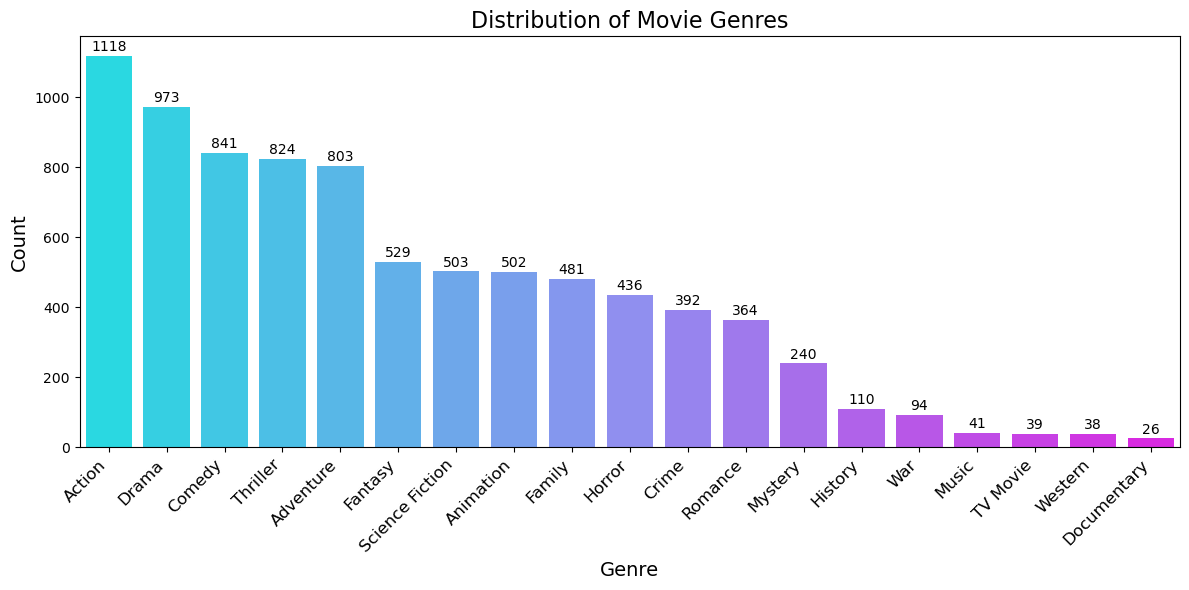

In [27]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=genre_counts2.index, y=genre_counts2.values, palette='cool')
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(genre_counts2.values):
    bar_plot.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../images/dist_movie_genre.png', bbox_inches='tight')


The chart provides an overview of the frequency of different genres in the dataset. Action emerges as the most prevalent genre, with a count of 1123. Following action, drama, comedy, adventure, and thriller are among the top genres, illustrating their popularity and frequent occurrence in the dataset. 

**Visualize Release Year**

In [28]:
#create new column that shows the release year
tmdb_df['release_year'] = pd.to_datetime(tmdb_df['release_date']).dt.year


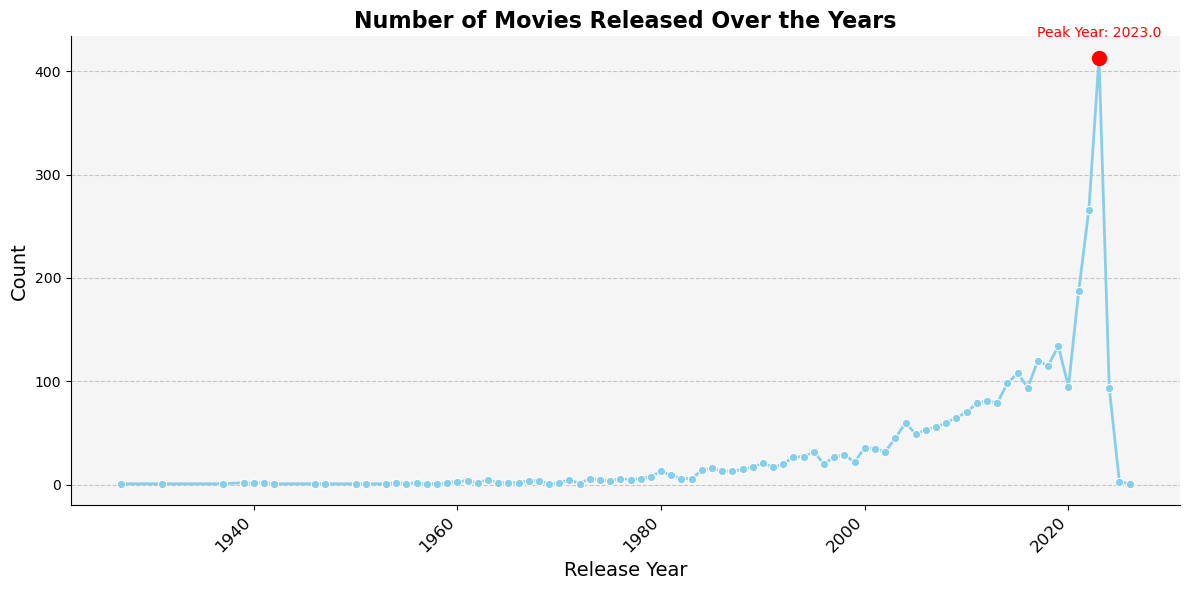

In [29]:
# Explore release years
release_year_counts = tmdb_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=release_year_counts.index, y=release_year_counts.values,
                         marker='o', color='skyblue', linewidth=2)
#highlight the peak year with red mark
peak_year = release_year_counts.idxmax()
plt.scatter(peak_year, release_year_counts.max(), color='red', s=100, zorder=5)

#annotate the peak year
plt.text(peak_year, release_year_counts.max() + 20, f'Peak Year: {peak_year}', 
         color='red', ha='center', fontsize=10)
plt.title('Number of Movies Released Over the Years', fontsize=16, weight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

#background customization
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.savefig('../images/movies_release_year.png', bbox_inches='tight')




The line plot provides a temporal exploration of movie releases within the dataset. The chart offers insights into the temporal distribution of movies, spanning from 1900 to 2026. The red marker highlights the peak year with the highest number of movie releases. In this case, 2023 stands out as the year with the maximum movie releases, with a count of 424. As such, the dataset has a lot of movies for that particular year followed by 2022, 2021, and 2018.

In [30]:
release_year_counts.sort_values(ascending=False)

release_year
2023.0    413
2022.0    266
2021.0    187
2019.0    134
2017.0    120
         ... 
1947.0      1
1946.0      1
1942.0      1
1937.0      1
2026.0      1
Name: count, Length: 85, dtype: int64

**Relationship between Popularity, Genre, User Rating and Vote Count**

In [31]:
#make a string column for genre name to be able to visualize it bc unhasable type error
tmdb_df['genre_ids_str'] = tmdb_df['genre_names'].astype(str)

In [32]:
#bc of large number of unique genre and title type, minimized the ones selected

#most frequent occuring
top_genres = tmdb_df['genre_ids_str'].value_counts().head(40).index
#highest average genre by popularity
top_genres2 = tmdb_df.groupby('genre_ids_str')['popularity'].mean().nlargest(40).index
# selecting the top 40 titles with highest populaity average
top_titles = tmdb_df.nlargest(40, 'popularity')


# selecting the top 40 movies based on user rating
top_user_titles = tmdb_df.nlargest(40, 'vote_average')
# Chighest average genre by user ratings
highest_user_genres = tmdb_df.groupby('genre_ids_str')['vote_average'].mean().nlargest(40)


/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_41966/1613283255.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='popularity',


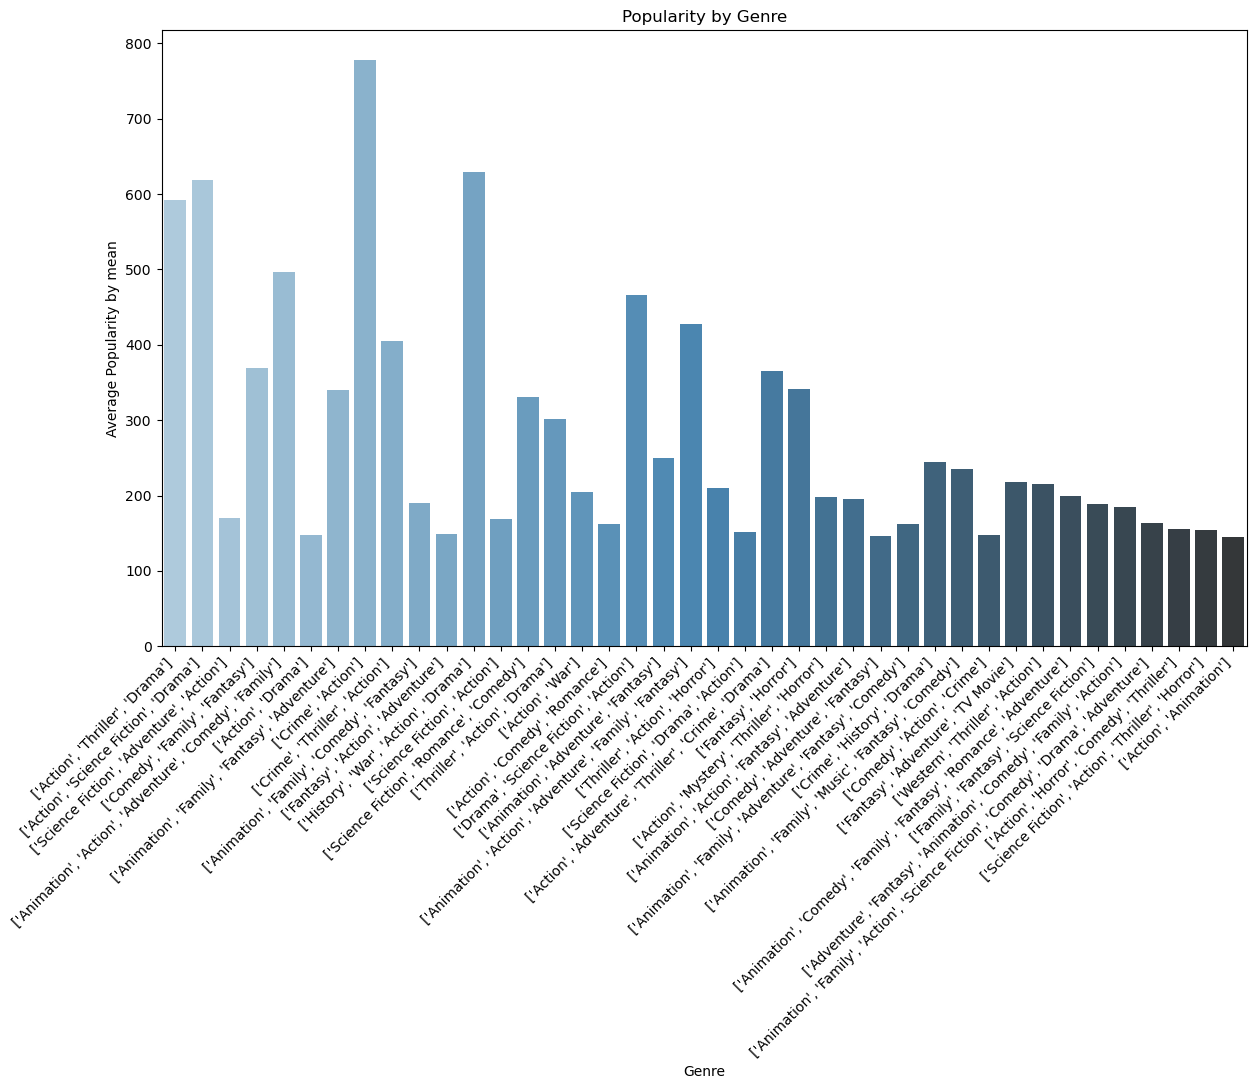

In [33]:
#genres with the highest average popularity, 
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='popularity', 
            data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres2)], ci=None, palette='Blues_d')
plt.title('Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity by mean')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40popular_movies_genre.png', bbox_inches='tight')

The chart showcases the top genres with the highest average popularity in descending order. The x-axis indicates the unique genre combination and the y-axis represents the average popularity.The genre with the highest average popularity is Crime and Action, followed by History, war, action, and drama.

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_41966/3706001854.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  top_titles_plot = sns.barplot(x='title', y='popularity',


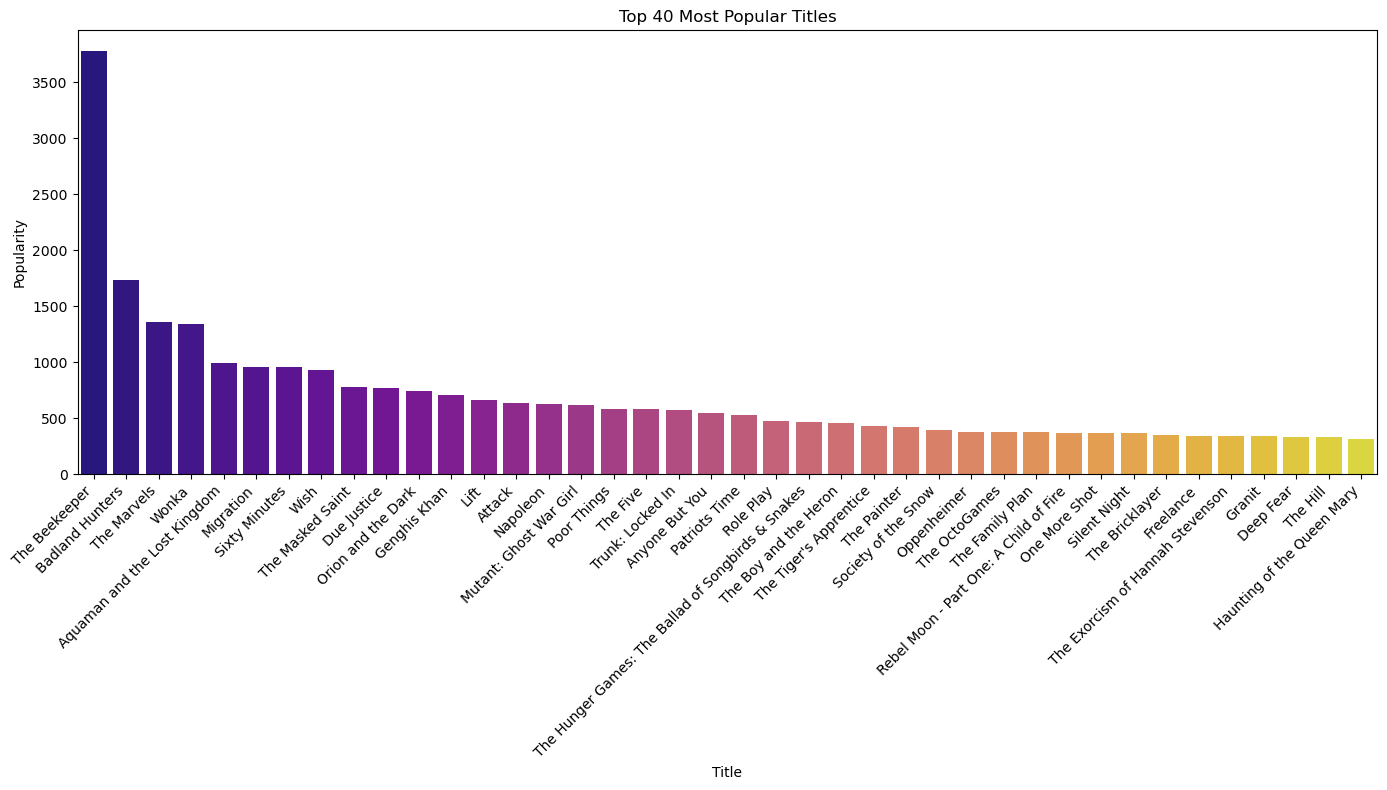

In [34]:
# Visualize the top 40 most popular titles
plt.figure(figsize=(14, 8))
top_titles_plot = sns.barplot(x='title', y='popularity', 
                              data=top_titles, ci=None, palette='plasma')
top_titles_plot.set_xticklabels(top_titles_plot.get_xticklabels(), rotation=45, ha='right') 
plt.title('Top 40 Most Popular Titles')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.tight_layout()
plt.savefig('../images/top_40_popular_titles.png', bbox_inches='tight')






The chart displays the popularity of the top 40 movie titles based on the 'popularity' column. The Beekeeper is the most popular title, as it has the highest bar on the chart, followed by Badland hunters. The chart showcases a diverse range of movie titles not only from america, but from other countries like korea(badland hunter), japan(The Boy and the Heron), russia(Time of Patriots), Latin America(The Society of Snow) and China (Mutant: Ghost Warrior).

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_41966/2227439708.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='popularity',


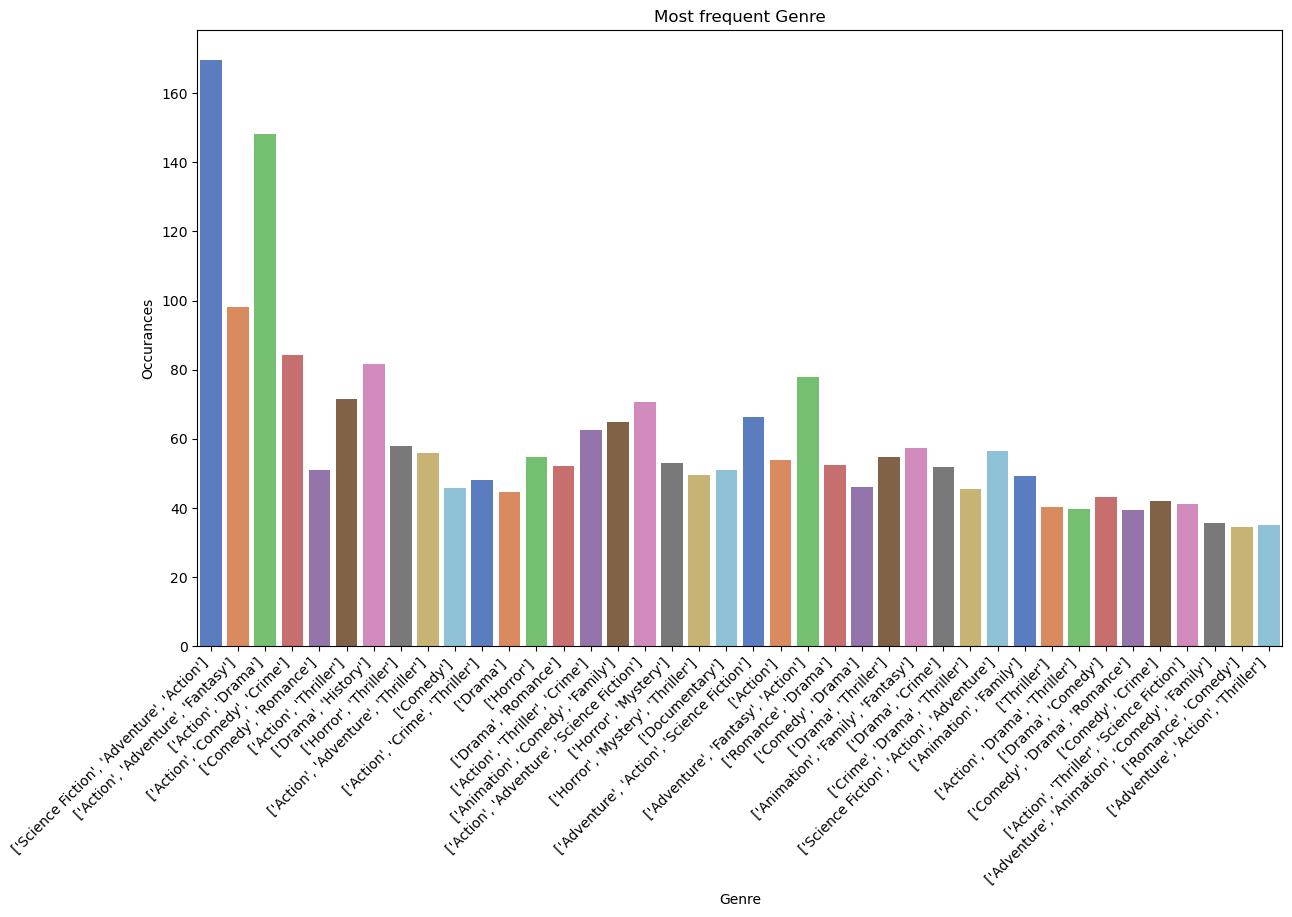

In [35]:
#visualize the top 40 most frequently occurring genres
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='popularity', 
            data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], ci=None, palette='muted')
plt.title('Most frequent Genre')
plt.xlabel('Genre')
plt.ylabel('Occurances')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40mostfrequent_genre.png', bbox_inches='tight')



The chart visualizes the frequency of occurrence for each genre among the top 40 movies

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_41966/1708878224.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='title', y='vote_average',


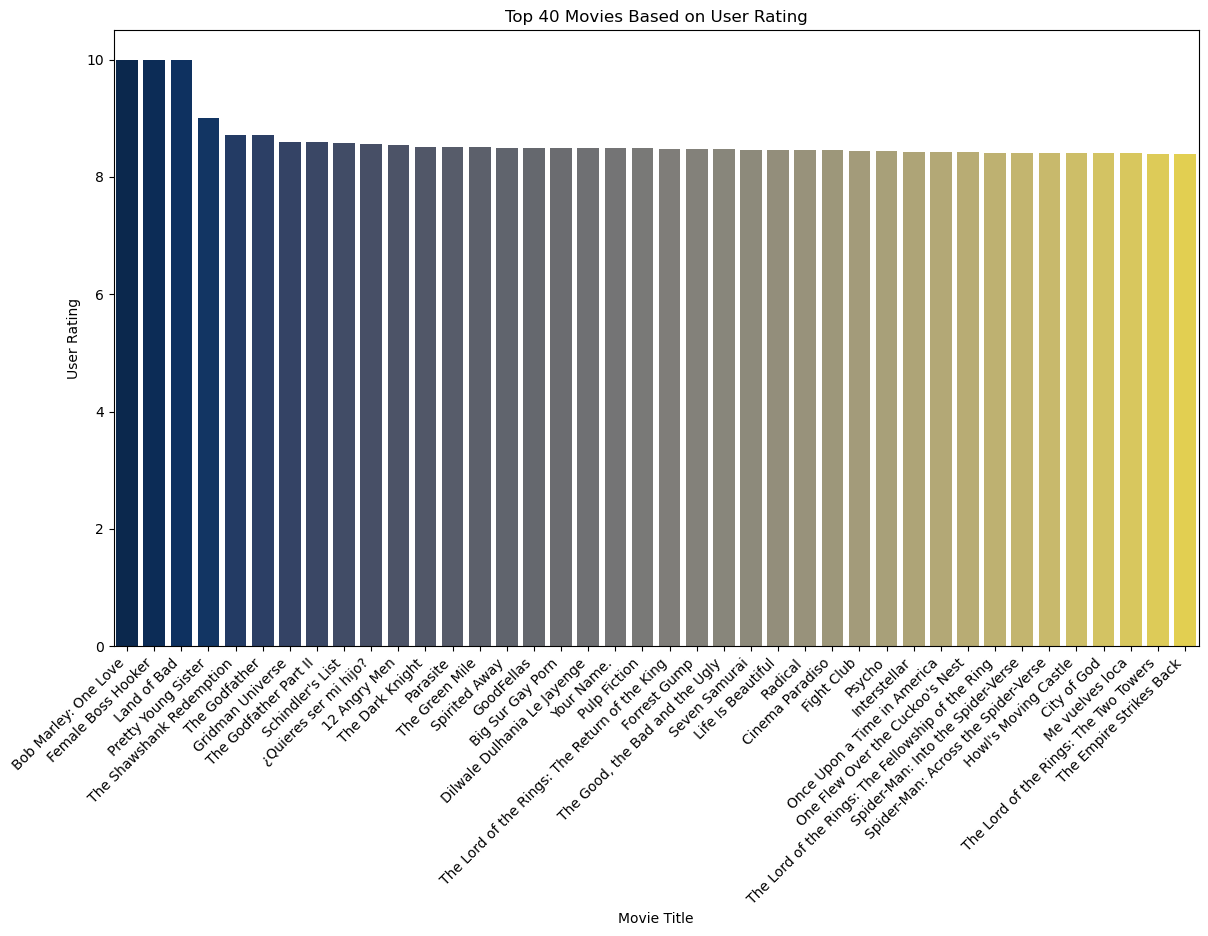

In [36]:
#top movies based on user rating
plt.figure(figsize=(14, 8))
sns.barplot(x='title', y='vote_average', 
            data=top_user_titles, ci=None, palette='cividis')
plt.title('Top 40 Movies Based on User Rating')
plt.xlabel('Movie Title')
plt.ylabel('User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/top40_user_rated_movies.png', bbox_inches='tight')

The barplot visualizes the average user ratings for the top 40 movies.Bob Marley: One Love and the korean film, the Female Boss Hooker have perfect 10 scores when it comes to user rating.

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_41966/4116190094.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='vote_average', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)],


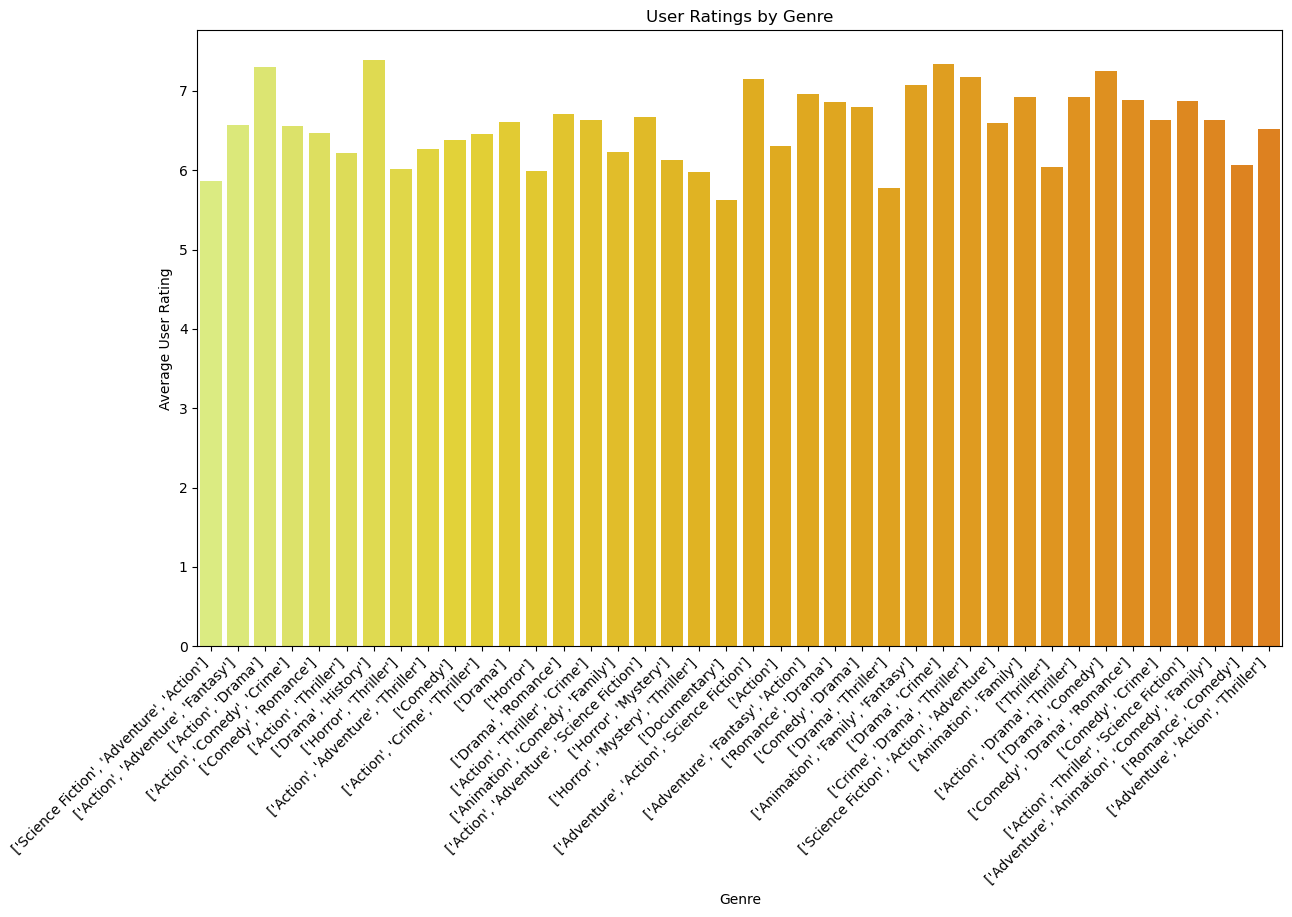

In [37]:
#visualize the top 40  most frequent genre based on user rating
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='vote_average', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], 
            ci=None, palette='Wistia')
plt.title('User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40movies_genre_byuser.png', bbox_inches='tight')


This chart shows the average user ratings for the top 40 movies, grouped by genre. 

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_41966/2174560119.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=highest_user_genres.index,


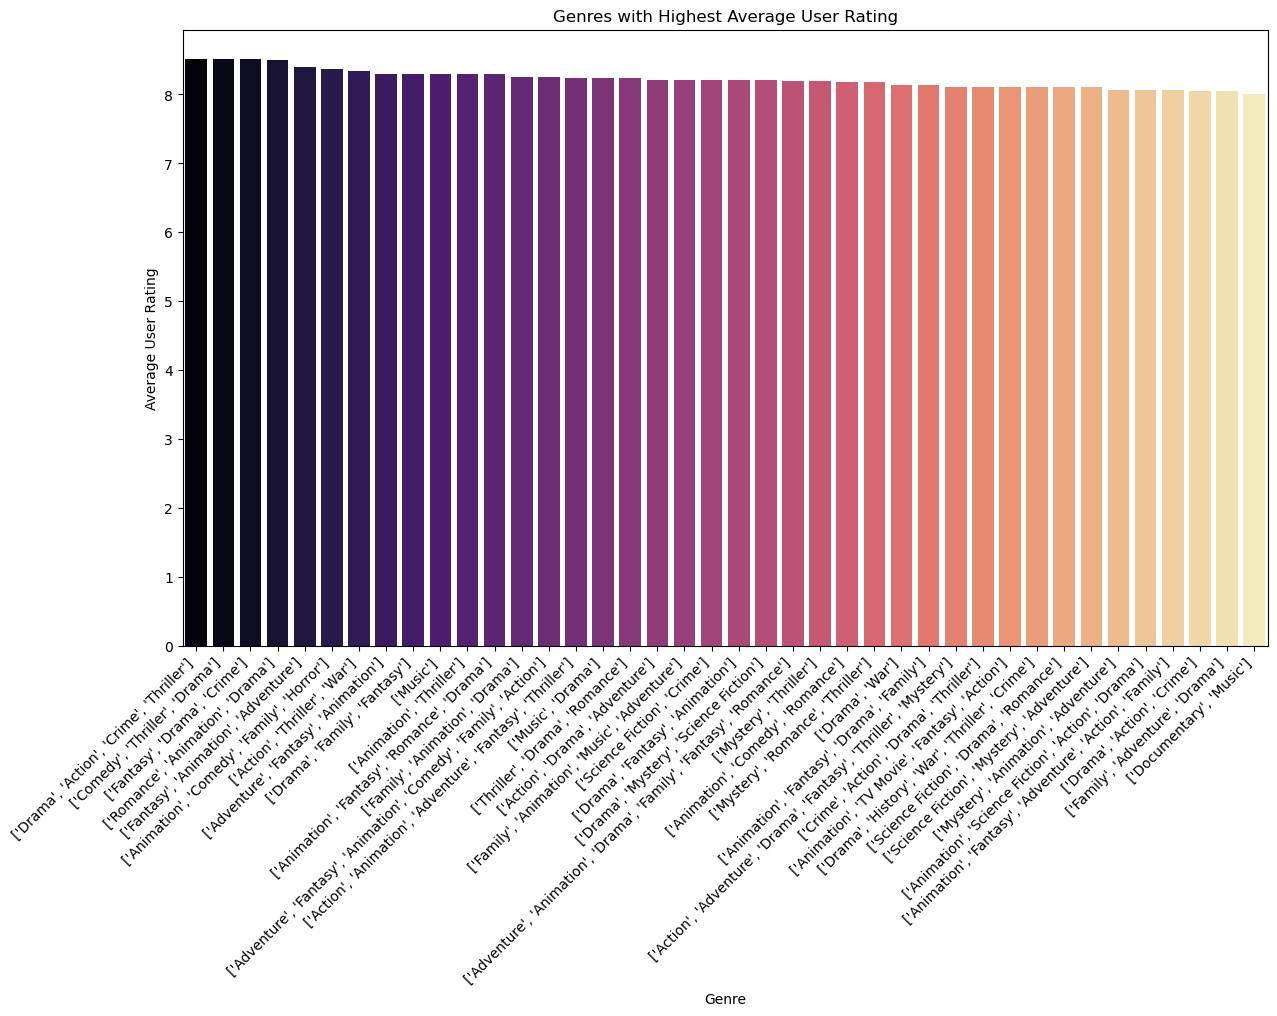

In [38]:
plt.figure(figsize=(14, 8))
sns.barplot(x=highest_user_genres.index, 
            y=highest_user_genres.values, ci=None, palette='magma')
plt.title('Genres with Highest Average User Rating')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/highest_avg_user_rated_genres.png', bbox_inches='tight')

The chart visulizes movie genres that consistently receive high user ratings. The combination of 'Drama', 'Action', 'Crime', and 'Thriller' genres tops the list with an impressive average rating of 8.515. Comedy combined with thriller and drama follows closely with an average rating of 8.512.

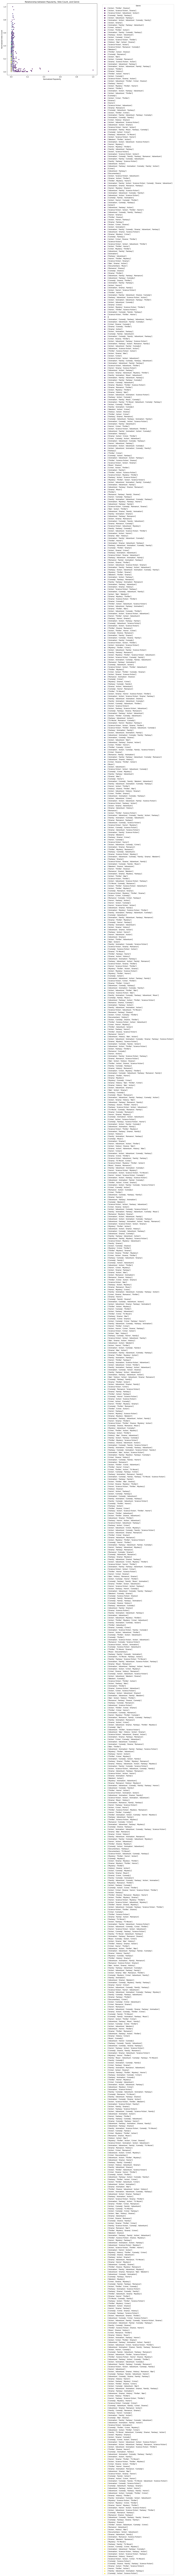

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='popularity_normalized', y='vote_count_normalized', 
                data=tmdb_df, hue='genre_ids_str', palette='viridis', alpha=0.7)
plt.title('Relationship between Popularity, Vote Count, and Genre')
plt.xlabel('Normalized Popularity')
plt.ylabel('Normalized Vote Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')



The scatter plot visually represents the relationship between normalized popularity, normalized vote count, and movie genres. Each point on the plot corresponds to a movie in the dataset (the one at 1.0 is more than likely the Beekeper), and the position of the point is determined by its normalized popularity on the x-axis and normalized vote count on the y-axis. The movies based on normalized popularity are concentrated around the range of 0.0 to 0.1 on the x-axis. Similarly, normalized vote counts are clustered around the range of 0.0 to 0.7 on the y-axis.


In [40]:
# Save the DataFrame to a CSV file
tmdb_df.to_csv('../data/tmdb_data.csv', index=False)
